<a href="https://colab.research.google.com/github/gilesitorr/Dataket/blob/main/Semana1/RallyDatos_Semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rally de Datos GTO
## _Semana 1_: Cultura

In [ ]:
# Se importan las librerías para el análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se define el estilo de las gráficas
sns.set_context('talk')

# Se define la paleta de colores de las gráficas
colors = ["#264653", "#2a9d8f", "#e9C46a", "#F4A261", "#E76F51"]
sns.set_palette(sns.color_palette(colors))

## Lectura de datos e información general sobre el dataset

In [ ]:
# Se lee el archivo
df = pd.read_excel("pps-a-2021.xlsx", sheet_name="pps-aprobado-2021")

In [ ]:
# Número de programas presupuestarios distintos
len(df["id_programa_presupuestario"].unique())

81

In [ ]:
# Programas presupuetarios por eje
print(df.groupby("descripcion_eje")["id_programa_presupuestario"].unique())

descripcion_eje
Desarrollo humano y social                                              [S019, E010, S003, E009, E048, E054, E061, S006, E012, E019, E064, E014, E045, E007, S008]
Desarrollo ordenado y sostenible                                              [P003, P010, K004, E021, E051, K003, K006, E026, E041, G001, E004, P006, G006, E042]
Economía para todos                                                                                               [S011, S021, S022, K005, S018, S010, E027, E020]
Educación de calidad                                                                      [E018, E024, E057, P004, E062, E038, E005, P005, E017, E047, E003, E028]
Gobierno humano y eficaz            [R007, E006, P011, P012, P018, R006, E002, R005, R008, M003, M004, M001, O006, E060, S016, E036, O005, E039, E063, R009, P001]
Seguridad y paz social                                                                          [E037, E015, E053, E032, G005, P014, E008, E031, E044, E050, E016]
Name: 

In [ ]:
# Se filtran sólo los programas presupuestarios de cultura
df_cultura = df[df["id_programa_presupuestario"]=="E003"]

In [ ]:
# Las dependencias
dependencias = df_cultura["descripcion_division"].unique()
dependencias

array(['Museo Iconográfico del Quijote',
       'Instituto Estatal de la Cultura del Estado de Guanajuato',
       'Fórum Cultural Guanajuato'], dtype=object)

In [ ]:
# El total del presupuesto aprobado
df_cultura["aprobado"].sum()

238078375.91

In [ ]:
# Para comparar, el presupuesto total aprobado para 2021
df["aprobado"].sum()

55628313128.98

In [ ]:
# El porcentaje de todo el plan presupuestario del 2021 destinado a cultura
100*df_cultura["aprobado"].sum()/df["aprobado"].sum()

0.42798057772845033

In [ ]:
# La orientación del programa
df_cultura["descripcion_modalidad"].unique()

array(['Prestación de Servicios Públicos'], dtype=object)

## Presupuesto por dependencia

In [ ]:
# Número de proyectos culturales
len(df_cultura)

31

In [ ]:
# Vemos que los centros gestores y las dependencias son los mismos
df_cultura["descripcion_centro gestor"].unique()

array(['Museo Iconográfico del Quijote',
       'Instituto Estatal de la Cultura del Estado de Guanajuato',
       'Fórum Cultural Guanajuato'], dtype=object)

In [ ]:
# El presupuesto por dependencia
presupuesto_por_dependencia = df_cultura[["descripcion_division",
                                          "aprobado"]].groupby("descripcion_division").sum().sort_values("aprobado",
                                                                                                         ascending=False)
presupuesto_por_dependencia

,aprobado
descripcion_division,
Instituto Estatal de la Cultura del Estado de Guanajuato,1.535750e+08
Fórum Cultural Guanajuato,7.546093e+07
Museo Iconográfico del Quijote,9.042421e+06


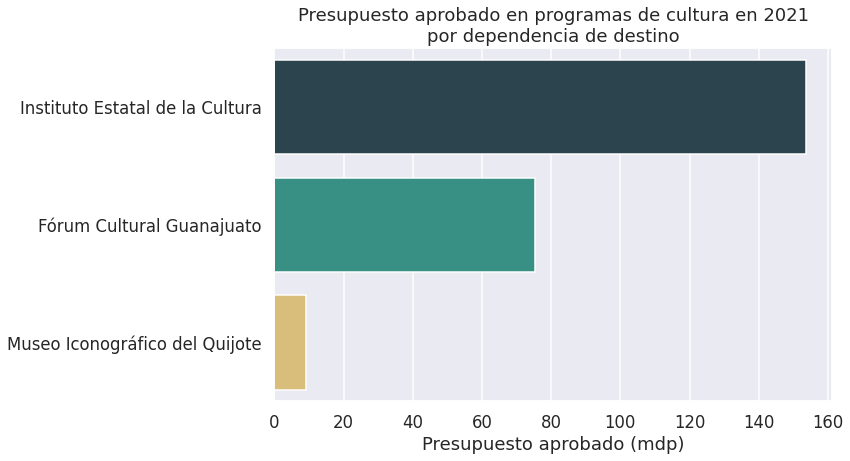

In [ ]:
# Gráfica del presupuesto por dependencia
plt.figure(figsize=(10, 6.5))

sns.barplot(x=presupuesto_por_dependencia["aprobado"]/1_000_000,
            y=list(map(lambda x: x[:31], presupuesto_por_dependencia.index))); # Para que no salgan nombres muy largos

plt.title("Presupuesto aprobado en programas de cultura en 2021\npor dependencia de destino")
plt.ylabel("", size=12)
plt.xlabel("Presupuesto aprobado (mdp)")

plt.show()

## Presupuesto por descripción del programa

In [ ]:
# El presupuesto dedicado a museos, teatros, bibliotecas y conservación de los mismos
condicion_1 = df_cultura["descripcion__proceso_proyecto"].str.contains("museo", case=False)
condicion_2 = df_cultura["descripcion__proceso_proyecto"].str.contains("teatro", case=False)
condicion_3 = df_cultura["descripcion__proceso_proyecto"].str.contains("biblio", case=False)
condicion_4 = df_cultura["descripcion__proceso_proyecto"].str.contains("conser", case=False)

df_cultura[condicion_1 | condicion_2 | condicion_3 | condicion_4]["aprobado"].sum()

140724648.7

In [ ]:
# Para que las descripciones de abajo puedan mostrarse completas
pd.options.display.max_colwidth = 200

# El total de los proyectos junto con su descripción y su presupuesto
for dependencia in dependencias:
  print(f"{dependencia.upper()}\n")
  print(df_cultura[df["descripcion_division"]==dependencia][["id_proceso_proyecto",
                                                             "descripcion__proceso_proyecto",
                                                             "aprobado"]].sort_values("aprobado",
                                                                                      ascending=False).to_string(index=False,
                                                                                                                 justify="right").title())
  print("\n\n")

MUSEO ICONOGRÁFICO DEL QUIJOTE

Id_Proceso_Proyecto                                                       Descripcion__Proceso_Proyecto    Aprobado
              P0413        Desarrollo Del Programa De Artes Visuales Del Museo Iconográfico Del Quijote  3654271.68
              P0411                                           Desarrollo Del Programa Editorial Del Miq  2431655.19
              P0412  Desarrollo De Eventos Artísticos Y Culturales En El Museo Iconográfico Del Quijote  2423053.78
              P2835                                   Desarrollo De Actividades De Fomento A La Lectura   533440.00



INSTITUTO ESTATAL DE LA CULTURA DEL ESTADO DE GUANAJUATO

Id_Proceso_Proyecto                                                                   Descripcion__Proceso_Proyecto     Aprobado
              P0433                                                        Operación De Los Museos Adscritos Al Iec  31959826.90
              P2043                                                  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
